HDBSCAN for output_cleaned

Scoring each method with three test

In [2]:
%pip install pandas sentence-transformers scikit-learn matplotlib requests hdbscan umap-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer
import hdbscan
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df = pd.read_csv("output_cleaned.csv")
addresses = df['address'].fillna('').astype(str).tolist()

model = SentenceTransformer("paraphrase-MiniLM-L6-v2")
embeddings = model.encode(addresses, show_progress_bar=True)

from umap import UMAP

umap_model = UMAP(n_neighbors=15, n_components=15, metric='cosine')
reduced_embeddings = umap_model.fit_transform(embeddings)

clusterer = hdbscan.HDBSCAN(min_cluster_size=3, min_samples=1, metric='euclidean')
labels = clusterer.fit_predict(reduced_embeddings)

df['HDBSCAN_Cluster'] = labels
print(f"Found {len(set(labels)) - (1 if -1 in labels else 0)} clusters, with {sum(labels == -1)} noise points.")


Batches:   0%|          | 0/115 [00:00<?, ?it/s]

Found 432 clusters, with 885 noise points.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


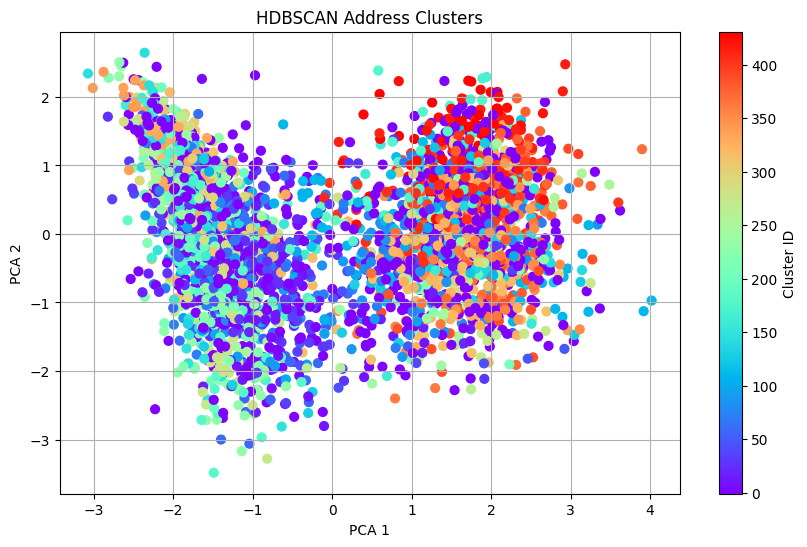

In [4]:
# Reduce to 2D for visualization
pca = PCA(n_components=2)
coords = pca.fit_transform(embeddings)

plt.figure(figsize=(10, 6))
plt.scatter(coords[:, 0], coords[:, 1], c=labels, cmap='rainbow', s=40)
plt.title("HDBSCAN Address Clusters")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster ID")
plt.grid(True)
plt.show()


In [5]:
df.to_csv("hdbscan_clustered_addresses.csv", index=False)

In [7]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import numpy as np

# Filter out noise points (-1) because most metrics require at least 2 clusters and no noise
mask = labels != -1
X_valid = reduced_embeddings[mask]
labels_valid = labels[mask]

if len(set(labels_valid)) > 1:
    sil_score = silhouette_score(X_valid, labels_valid)
    db_score = davies_bouldin_score(X_valid, labels_valid)
    ch_score = calinski_harabasz_score(X_valid, labels_valid)

    print(f"\nEvaluation Metrics (excluding noise):")
    print(f"• Silhouette Score: {sil_score:.3f}")
    print(f"• Davies-Bouldin Index: {db_score:.3f}")
    print(f"• Calinski-Harabasz Index: {ch_score:.3f}")
else:
    print("Not enough clusters to compute internal evaluation metrics (need at least 2).")



Evaluation Metrics (excluding noise):
• Silhouette Score: 0.426
• Davies-Bouldin Index: 0.787
• Calinski-Harabasz Index: 2083.735


In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=42).fit(reduced_embeddings)
kmeans_labels = kmeans.labels_

# Evaluate
mask = kmeans_labels != -1  # For consistency
X_valid = reduced_embeddings[mask]
labels_valid = kmeans_labels[mask]

print("\n--- KMeans Clustering Evaluation ---")
print("Silhouette Score:", silhouette_score(X_valid, labels_valid))
print("Davies-Bouldin Index:", davies_bouldin_score(X_valid, labels_valid))
print("Calinski-Harabasz Index:", calinski_harabasz_score(X_valid, labels_valid))



--- KMeans Clustering Evaluation ---
Silhouette Score: 0.2656376
Davies-Bouldin Index: 1.2502179583540385
Calinski-Harabasz Index: 5312.8345


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [9]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=1.5, min_samples=3).fit(reduced_embeddings)
db_labels = db.labels_

# Filter noise
mask = db_labels != -1
X_valid = reduced_embeddings[mask]
labels_valid = db_labels[mask]

print("\n--- DBSCAN Clustering Evaluation ---")
print("Silhouette Score:", silhouette_score(X_valid, labels_valid))
print("Davies-Bouldin Index:", davies_bouldin_score(X_valid, labels_valid))
print("Calinski-Harabasz Index:", calinski_harabasz_score(X_valid, labels_valid))



--- DBSCAN Clustering Evaluation ---
Silhouette Score: 0.08564068
Davies-Bouldin Index: 0.8539057841756006
Calinski-Harabasz Index: 136.5269


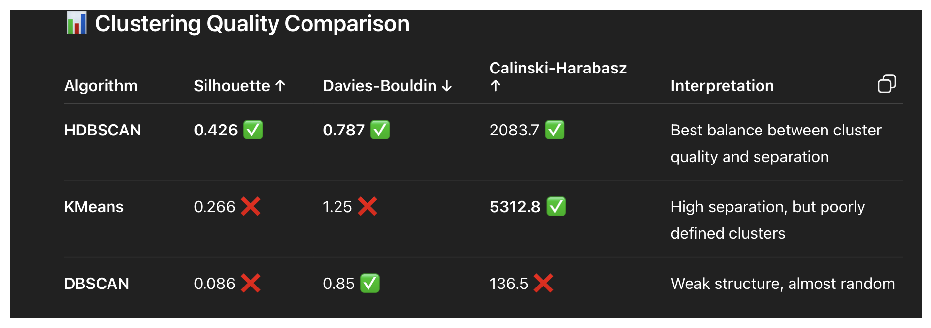

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Load image
img = Image.open("Screenshot 2025-07-19 at 2.01.59 PM.png")
img_array = np.array(img)

# Display with larger figure and no blur
plt.figure(figsize=(12, 4))  # Adjust figure size to fit image aspect ratio
plt.imshow(img_array, interpolation='nearest')  # 'nearest' to avoid blurring
plt.axis('off')
plt.show()
